# <center>Challenge 1<center>

<p>Team Name:CK
<p>Student Names: Austin Freeman and Cameron Tharpe
<p>Student W#s:W0652871 and W0668972

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [137]:
import array as arr
import random
from sklearn import preprocessing
import numpy as np
import math
import pandas as pd

#from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt

# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b>

a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [138]:
#Creating data set D with a1 and a2

D = []
for i in range(5):
    a1 = (np.random.normal(loc=20, scale=(4), size=None))
    a2 = (np.random.uniform(low=14, high=26))
    D.append([a1,a2])

print("D:", D)

D: [[20.267607761863275, 25.84915455134677], [9.401611717255905, 18.460376923332277], [15.559317313764055, 19.165751630198997], [22.890851340720097, 15.41955573992449], [17.143418682031218, 22.06461340835145]]


## Explore Data

Apply min-max scaling to D, P1:

In [139]:
Min_Max = MinMaxScaler()
Min_Max.fit(D)

P1 = Min_Max.transform(D)
print("P1: \n", P1)

P1: 
 [[0.80553066 1.        ]
 [0.         0.29155687]
 [0.45649019 0.35918888]
 [1.         0.        ]
 [0.57392464 0.63713454]]


Apply std-mean scaling to D, P2

In [140]:
std_Scale = StandardScaler()
std_Scale.fit(D)

P2 = std_Scale.transform(D)
print("P2: \n", P2)

P2: 
 [[ 0.7009227   1.60219362]
 [-1.66800835 -0.4903819 ]
 [-0.32554698 -0.29061275]
 [ 1.27282454 -1.35157279]
 [ 0.0198081   0.53037382]]


Apply min-max scaling to P1, P3:

In [141]:
#Min-Maxing P1 will return original data set prior to first Min-Max

Min_Max_2 = MinMaxScaler()
Min_Max_2.fit(P1)

P3 = Min_Max_2.transform(D)
print("P3: \n", P3)

P3: 
 [[20.26760776 25.84915455]
 [ 9.40161172 18.46037692]
 [15.55931731 19.16575163]
 [22.89085134 15.41955574]
 [17.14341868 22.06461341]]


Plot P1, P2, and P3 for each attribute on a separate chart. Each sub-plot must be side-by-side:

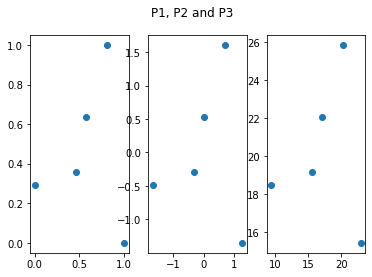

In [142]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle("P1, P2 and P3")

ax1.scatter(*zip(*P1))
ax2.scatter(*zip(*P2))
ax3.scatter(*zip(*P3))

Compare P1 and P3. Discuss the relation between P1 and P3:

# PART II

## Prepare Data

b1 = 2*a1<br>
b2 = normal distribution N(mean=40,var=4)<br>
Pr(b1,b2) = {(b1, b2)}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x,20), shift in X-dimension by 20 units towards right, data objects with class negative<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [171]:
#creating b1 and b2
Pre = []
for i in range(0,len(D)):
    b1 = ((D[i][0]) * 2)
    b2 = (np.random.normal(loc=40, scale=(4), size=None))
    Pre.append([b1,b2])
    
Pr = np.array(Pre)
print("Pr: \n", Pr)

###


###Rotating Pr
def rotation(degrees):
    theta = np.radians(degrees)
    
    rMatrix = np.array( ((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta)) ))
    return rMatrix

P_rotate = rotation(45)

P=[]
for i in range(0, len(Pr)):
    P.append(P_rotate.dot(Pr[i]))

print("\nP (Pr rotated 45 deg counter-clockwise): \n", pd.DataFrame(P))

###


### Shifting Pr 20 units in the x-direction
Nr = []
for i in range(0, len(Pr)):
    a = Pr[i][0] + 20
    b = Pr[i][1]
    Nr.append([a,b])

Nr = np.array(Nr)
print("\nNr: \n",Nr)

###


### Rotating Nr 45 degrees counter-clockwise
N_rotate = rotation(45)

N=[]
for i in range(0, len(Nr)):
    N.append(N_rotate.dot(Nr[i]))
             
print("\nN (Nr rotated 45 deg counter-clockwise): \n", pd.DataFrame(N))

###

Pr: 
 [[40.53521552 44.83327636]
 [18.80322343 32.89503343]
 [31.11863463 39.88540713]
 [45.78170268 36.94642006]
 [34.28683736 45.23104157]]

P (Pr rotated 45 deg counter-clockwise): 
           0          1
0 -3.039188  60.364640
1 -9.964414  36.556188
2 -6.199044  50.207439
3  6.247488  58.497617
4 -7.738721  56.227631

Nr: 
 [[60.53521552 44.83327636]
 [38.80322343 32.89503343]
 [51.11863463 39.88540713]
 [65.78170268 36.94642006]
 [54.28683736 45.23104157]]

N (Nr rotated 45 deg counter-clockwise): 
            0          1
0  11.102948  74.506775
1   4.177721  50.698324
2   7.943091  64.349575
3  20.389624  72.639752
4   6.403415  70.369767


## Scaling

Apply scaling to P by min-max to [0, 1], P1:

In [144]:
Min_Max_P = MinMaxScaler()
Min_Max_P.fit(P)

P1 = Min_Max_P.transform(P)
print("P1: \n", P1)

P1: 
 [[0.4999364  0.        ]
 [0.         1.        ]
 [0.51809249 0.67996309]
 [1.         0.15714393]
 [0.56720606 0.50920568]]


Apply scaling to P by min-max to [-1, 1], P2:

In [145]:
Min_Max_Neg = MinMaxScaler(feature_range = (-1,1))
Min_Max_Neg.fit(P)

P2 = Min_Max_Neg.transform(P)
print("P2: \n", P2)

P2: 
 [[-1.27192546e-04 -1.00000000e+00]
 [-1.00000000e+00  1.00000000e+00]
 [ 3.61849766e-02  3.59926186e-01]
 [ 1.00000000e+00 -6.85712133e-01]
 [ 1.34412114e-01  1.84113559e-02]]


Apply scaling to P by std-normal, P3:

Apply scaling to N by min-max to [0, 1], N1:

In [172]:
Min_Max_N = MinMaxScaler()
Min_Max_N.fit(N)

N1 = Min_Max_N.transform(N)
print("N1: \n", N1)

N1: 
 [[0.42716926 1.        ]
 [0.         0.        ]
 [0.23225961 0.57337838]
 [1.         0.92158151]
 [0.13728761 0.82623783]]


Apply scaling to N by min-max to [-1, 1], N2:

In [173]:
Min_Max_N2 = MinMaxScaler(feature_range = (-1,1))
Min_Max_N2.fit(N)

N2 = Min_Max_N2.transform(N)
print("N2: \n", N2)

N2: 
 [[-0.14566148  1.        ]
 [-1.         -1.        ]
 [-0.53548079  0.14675676]
 [ 1.          0.84316301]
 [-0.72542478  0.65247567]]


Apply scaling to N by std-normal, N3:

## Visualize Data

Plot Pr, P, P1, P2, P3 in the same figure on a separate sub-plots of 2 by 3:

Plot Nr, N, N1, N2, N3 in the same figure on a separate sub-plots of 2 by 3:

## K-NN Classification

### Obtain 60% training dTrn, 20% validation dVal, 20% test dTst for each data set per class:

In [146]:
def getData(pInput,pRatio):
    #complete as needed
    #return dTrn, dVal, dTst
    #pRatio = (0.6, 0.2, 0.3) as an example
    pass
        
#



### Explore K-NN Classifiers

In [147]:
'''
Performance measures: Sensitivity, specificity, AUC, F1

Define a function knnClassifier(pTrn, pVal, pTst, eps, *kwargs)
k = 2
Loop: Increase k by 1 until the accuracy change is less than eps:<br>
   Generate Model
   Obtain contingency table based on validation data set
   Calculate accuracy over validation data set
   Calculate accuracy change "ac"
   if ac < eps:
       Obtain contingency table for testing data set
       Calculate performance measures for testing data set
       Plot ROC
       Plot accuracy-K chart
       return (k, performance measures, contingency table, others as needed)
   else:
       k = k + 1
   #
#   
'''

'\nPerformance measures: Sensitivity, specificity, AUC, F1\n\nDefine a function knnClassifier(pTrn, pVal, pTst, eps, *kwargs)\nk = 2\nLoop: Increase k by 1 until the accuracy change is less than eps:<br>\n   Generate Model\n   Obtain contingency table based on validation data set\n   Calculate accuracy over validation data set\n   Calculate accuracy change "ac"\n   if ac < eps:\n       Obtain contingency table for testing data set\n       Calculate performance measures for testing data set\n       Plot ROC\n       Plot accuracy-K chart\n       return (k, performance measures, contingency table, others as needed)\n   else:\n       k = k + 1\n   #\n#   \n'

In [148]:
def knnClassifier(pTrn, pVal, pTst, eps, *kwargs):
    #complete as needed
    #return the model and performance measures
    k = 2
    

#

### Run experiments for each data set {(Pr, Nr), (P, N), (P1, N1), (P2, N2), (P3, N3)}

In [149]:
'''
For each data set (Pi, Ni)
   Get training, validation, test data sets
   Find the best model
   Obtain contingency table
   Calculate performance measures for the test data set
   Plot ROC
   Plot accuracy-K chart
'''

'\nFor each data set (Pi, Ni)\n   Get training, validation, test data sets\n   Find the best model\n   Obtain contingency table\n   Calculate performance measures for the test data set\n   Plot ROC\n   Plot accuracy-K chart\n'

## Discussion
Discuss how scaling affects the classification performance of K-NN classifier based on each performance measures 

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.